In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readData(fileName):
    array = []
    lineList = [line.rstrip('\n') for line in open(fileName)]
    for line in lineList:
        temp = []
        items = line.split()        
        for item in items:
            temp.append(int(item))
        array.append(temp)
    return array

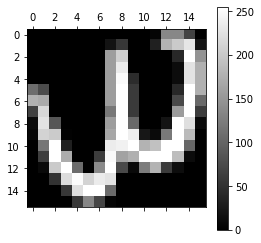

In [5]:
def vis(data, auto = False):
    x = []
    y = []
    v = []
    for i,s in enumerate(data):
        x.append(int(i/16))
        y.append(i%16)
        v.append(s)
    m = np.zeros((max(x)+1, max(y)+1))
    for ii in range(len(v)):
        m[x[ii]][y[ii]] = v[ii]
    if auto: 
        plt.matshow(m, cmap=plt.get_cmap('gray'))
    else:
        plt.matshow(m, cmap=plt.get_cmap('gray'), vmin= 0, vmax=255)
    plt.colorbar()
    plt.show()
data = readData('three.txt')
vis(data[0])

400
256
[1.125, 7.4075, 10.7375, 12.405, 13.0, 8.74, 4.425, 1.9825, 1.21, 1.7725, 7.93, 21.5225, 50.16, 73.59, 56.2525, 10.88, 6.0725, 23.205, 34.2425, 40.3375, 38.0475, 26.7475, 16.5225, 11.1825, 7.7925, 12.7375, 32.7325, 75.315, 131.0525, 151.05, 135.4225, 50.99, 11.77, 42.325, 48.84, 47.67, 45.025, 39.285, 28.5375, 24.495, 20.5325, 29.235, 56.0075, 87.26, 97.9, 109.135, 152.8475, 81.1525, 21.2825, 62.12, 57.9575, 43.9675, 40.195, 44.18, 44.5725, 44.495, 39.875, 49.5375, 67.78, 67.3325, 53.8825, 84.1625, 168.9125, 94.925, 29.6025, 78.1425, 67.1675, 44.9075, 39.66, 48.75, 68.235, 73.785, 68.995, 68.9575, 65.705, 48.695, 45.02, 85.575, 179.0475, 98.425, 39.505, 101.8225, 78.3675, 51.4125, 43.475, 55.0575, 89.695, 110.3475, 100.4125, 77.3575, 54.155, 41.4675, 45.525, 89.04, 175.51, 91.99, 51.79, 126.695, 87.4475, 50.375, 41.3225, 60.4925, 109.04, 143.8025, 122.425, 81.7, 52.11, 40.8025, 48.225, 87.0925, 164.81, 83.2175, 63.04, 145.0275, 90.89, 46.2, 35.7725, 68.1725, 120.38, 156.695, 12

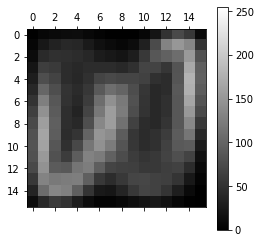

In [7]:
data = readData('combine.txt')
print(len(data))
print(len(data[0]))
mean = []
for j in range(256):
    s = 0
    for i in range(400):
        s += data[i][j]
    s /= 400
    mean.append(s)
print(mean)
vis(mean)

In [8]:
centered=[]

for i in range(400):
    temp = []
    for j in range(256):
        temp.append(data[i][j] -mean[j])
    centered.append(temp)

X = np.array(centered)

In [9]:
S = np.dot(X.T,X)/(len(X)-1)
for i in range(5):
    for j in range(5):
        print ("%.5f" % S[i][j], end = " " )

59.16729 142.14944 28.68202 -7.17857 -14.33584 142.14944 878.93879 374.13731 24.12778 -87.12782 28.68202 374.13731 1082.90586 555.22688 33.72431 -7.17857 24.12778 555.22688 1181.24409 777.77193 -14.33584 -87.12782 33.72431 777.77193 1429.95990 

237155.24629048567
145188.35268682535


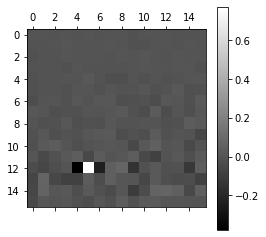

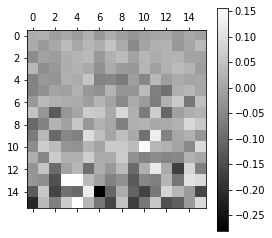

In [10]:
eigenvalues, eigenvectors = np.linalg.eig(S)
print(eigenvalues[0])
print(eigenvalues[1])
vis(eigenvectors[0],True)
vis(eigenvectors[1],True)

In [11]:
V = np.column_stack([eigenvectors[0],eigenvectors[1]])
print(np.dot(X[0],V))
print(np.dot(X[200],V))

[-109.35522726   77.52109833]
[ 94.07708737 126.87969027]


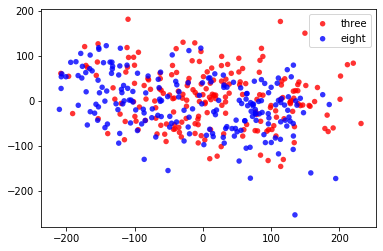

In [61]:
threex1 = []
threex2 = []
eightx1 = []
eightx2 = []
for i in range(400):
    if i < 200:
        threex1.append(np.dot(X[i],V)[0])
        threex2.append(np.dot(X[i],V)[1])
    else:
        eightx1.append(np.dot(X[i],V)[0])
        eightx2.append(np.dot(X[i],V)[1])
data = ((threex1,threex2),(eightx1,eightx2))
colors = ("red", "blue")
groups = ("three","eight")
fig = plt.figure()
ax = fig.add_subplot()
for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)
leg = ax.legend();